### 얼굴 인식 test

In [ ]:
%pip install DeepFace
%pip install opencv-python
%pip install tf-keras

In [2]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt

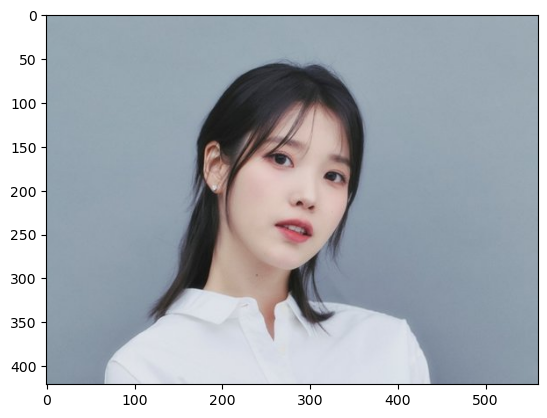

In [3]:
# 이미지 저장 경로
img_path = './images/아이유/아이유01.png'
# 이미지 읽기
img = cv2.imread(img_path)
# 이미지 확인
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

24-09-19 21:46:02 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /Users/iseoyeon/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:07<00:00, 16.2MB/s] 


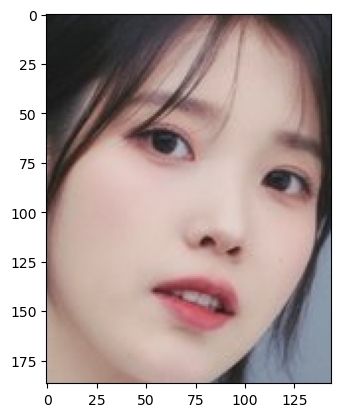

In [8]:
# 이미지에서 얼굴 검출

# 얼굴 검출 모델은 'opencv-retinaface'를 사용
faces = DeepFace.extract_faces(img_path=img, detector_backend='retinaface')
face = faces[0]['face'] # array
face_location = faces[0]['facial_area']
# 이미지 자르기
cropped_face = img[ face_location['y']:face_location['y']+face_location['h'], face_location['x']:face_location['x']+face_location['w'], ]
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))

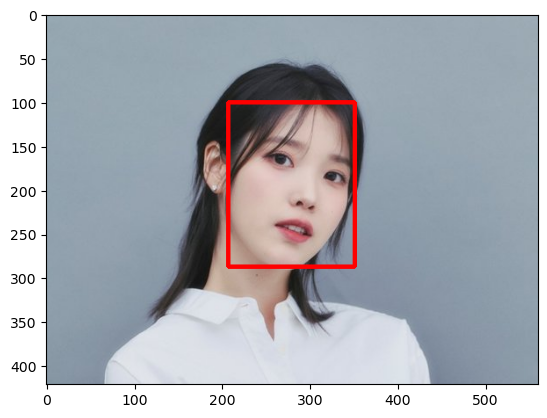

In [9]:
cv2.rectangle(img, (face_location['x'], face_location['y']), (face_location['x'] + face_location['w'], face_location['y'] + face_location['h']), (0, 0, 255), 4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
# 얼굴 표현 모델 목록 (원하는 모델 선택 사용)
embeddings_models =['VGG-Face', 'Facenet', 'Facenet512', 'OpenFace', 'DeepFace', 'DeepID', 'ArcFace', 'Dlib', 'SFace']
# 얼굴 표현(임베딩)
embedding = DeepFace.represent(img_path=img, detector_backend='retinaface', model_name='Facenet512')

# 벡터 크기 확인
print(len(embedding[0]['embedding']))
# 벡터값 확인
print(embedding[0]['embedding'])

24-09-19 21:55:55 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: /Users/iseoyeon/.deepface/weights/facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:05<00:00, 16.6MB/s]


512
[0.71480393409729, -1.3659700155258179, 0.06487181037664413, 0.9194955229759216, 0.8063639998435974, -0.2639555335044861, -1.0944836139678955, 0.2893698215484619, 1.1868637800216675, 0.3911651372909546, 2.2828164100646973, 1.0549334287643433, 1.3847384452819824, 0.04817701876163483, 1.023765206336975, -0.16520985960960388, -0.9399358034133911, -0.20781376957893372, -1.8455561399459839, 0.2406848520040512, -1.1550836563110352, -0.35894057154655457, 0.298614501953125, -1.1869134902954102, -2.7072668075561523, 0.8956372737884521, -1.9214591979980469, -0.5473182797431946, -1.5167688131332397, -0.8215425610542297, 0.12328614294528961, 0.9902555346488953, 0.08826210349798203, -0.7756618857383728, -0.738623321056366, 0.5448514819145203, 1.205386757850647, -0.9361761808395386, -1.4656591415405273, 1.4328465461730957, -0.16434346139431, 1.634821891784668, 0.3713254928588867, -0.5610209703445435, 1.6824235916137695, 1.016388177871704, 1.8138643503189087, 0.4449802041053772, -1.01796030998229

{'verified': True, 'distance': 0.09518542061469315, 'threshold': 0.3, 'model': 'Facenet512', 'detector_backend': 'retinaface', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 207, 'y': 100, 'w': 144, 'h': 187, 'left_eye': (327, 185), 'right_eye': (268, 168)}, 'img2': {'x': 152, 'y': 73, 'w': 203, 'h': 277, 'left_eye': (308, 182), 'right_eye': (213, 180)}}, 'time': 2.05}


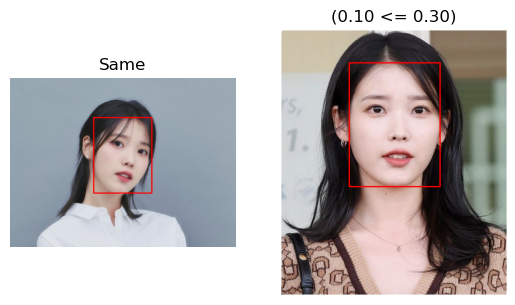

In [19]:
img1_path = './images/아이유/아이유01.png'
img1 = cv2.imread(img1_path)
# 두번째 이미지 불러오기
img2_path = './images/아이유/아이유02.png'
img2 = cv2.imread(img2_path)
# 얼굴 검증
result = DeepFace.verify(img1_path=img1, img2_path=img2, detector_backend='retinaface', model_name='Facenet512', distance_metric='cosine')
# 결과 확인
print(result)
distance = result['distance']
threshold = result['threshold']
verified = result['verified']
facial_area1 = result['facial_areas']['img1']
facial_area2 = result['facial_areas']['img2']
if verified:
    verified_str = 'Same'
    distance_str = '(%.2f <= %.2f)' % (distance, threshold)
else:
    verified_str = 'Different'
    distance_str = '(%.2f > %.2f)' % (distance, threshold) # 결과 시각화
flg = plt.figure()
rows = 1
cols = 2
ax1 = flg.add_subplot(rows, cols, 1)
cv2.rectangle(img1, (facial_area1['x'], facial_area1['y']), (facial_area1['x'] + facial_area1['w'], facial_area1['y'] + facial_area1['h']), (0, 0, 255), 2)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title(verified_str)
ax1.axis("off")
ax2 = flg.add_subplot(rows, cols, 2)
cv2.rectangle(img2, (facial_area2['x'], facial_area2['y']), (facial_area2['x'] + facial_area2['w'], facial_area2['y'] + facial_area2['h']), (0, 0, 255), 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title(distance_str)
ax2.axis("off")
plt.show()